Группа DS03-onl

Студент Парфимович Алексей

Домашнее задание №4

С использованием библиотек Numpy и Pandas написать программу реализующую:
1. Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
2. Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
3. Подсчет длин предложений и их количества.
4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
5. Построение гистограммы частоты встречаемости слов.

Перед решением задания проанализировать задачу и обосновать алгоритм ее решения в текстовом виде. В процессе написания кода использовать комментарии.

Вариант №1.	
Выполнить загрузку файла,
Определить критерии выделения отдельных предложений и слов в тексте,
Выполнить разбиение полученной строки на отдельные предложения и слова,
Подсчитать количество предложений и их длину (в словах), отобразить полученные данные.

In [ ]:
# Тестовый фрагмент текста 
text="""
A MARKET EKONOMY.
Throughout history, every society has faced the fundamental economic problem of deciding what to produce, and for whom, in a world of limited resources. In the 20th century, two competing economic systems, broadly speaking, have provided very different answers: command economies directed by a centralized government, and market economies based on private enterprise. Today, in the last decade of the 20th century, it is clear that, for people throughout the world, the central, command economy model has failed to sustain economic growth, to achieve a measure of prosperity, or even to provide economic security for its citizens.
Yet for many, the fundamental principles and mechanisms of the alternative, a market economy, remain unfamiliar or misunderstood - despite its demonstrable successes in diverse societies from Western Europe to North America and Asia. In part, this is because the market economy is not an ideology, but a set of time-tested practices and institutions about how individuals and societies can live and prosper economically. Market economies are, by their very nature, decentralized, flexible, practical and changeable. The central fact about market economies is that there is no center. Indeed, one of the founding metaphors for the private marketplace is that of the "invisible hand."
Market economies may be practical, but they also rest upon the fundamental principle of individual freedom: freedom as a consumer to choose among competing products and services; freedom as a producer to start or expand a business and share its risks and rewards; freedom as a worker to choose a job or career, join a labor union or change employers.
It is this assertion of freedom, of risk and opportunity, which joins together modern market economies and political democracy.
Market economies are not without their inequities and abuses - many of them serious - but it is also undeniable that modern private enterprise and entrepreneurial spirit, coupled with political democracy, offers the best prospect for preserving freedom and providing the widest avenues for economic growth and prosperity for all.
"""

# Определим паттерны регулярных выражений для выделения в тексте отдельных предложений и слов 
import re

# Паттерн для выделения отдельных предложений 
sentence_pattern = re.compile(r'([\w][^?!.]*[.?!])')
# Паттерн для выделения отдельных слов - состоящих из букв, цифр, символа подчеркивания, длиной не менее 3 символов
word_pattern = re.compile(r'[\w]{3,}')
# Паттерн для удаления службных символов и знаков препинания
remove_pattern = re.compile(r'[\W]+')

# Выполним парсинг текста - на выходе получим вложенный список предложения и входящих в них слов 
parsed_text = []
for sent in sentence_pattern.findall(text.lower()):
    sent = re.sub(remove_pattern,' ', sent)
    parsed_text.append(re.findall(word_pattern, sent))

#print(parsed_text)

# Сформируем отельный список слов выделенных в тексте
word_list = [item for sublist in parsed_text for item in sublist]

print(word_list)

'''
# Выполним сериализацию результатов в поток байт и сохраним полученные данные в файле
import pickle

with open('data.pickle', 'wb') as f:
    pickle.dump(word_list, f)

'''

from collections import Counter

# Сформируем словарь содержащий все выделенные в тексте слова и частоту их вхождения в текст
word_dict = {}

from collections import Counter

for word, freq in Counter(word_list).items():
    word_dict[word] = freq

print (sorted(word_dict.items()))

Шаг №2.
Выполнить преобразование слов в базовую форму - выбран подход "Лемматизации", как преобразующий в слова в их значимую базовую форму
Из представленых пакетов выбран Spacy Lemmatizer, как поддерживающий несколько языков и качетственную лемматизацию

Выполнить подсчет частоты встречаемости слов в загруженном тексте,
Отобразить полученные результаты.

[en:0.9999982844794435]

Перечень слов отсортированный по частоте, для значений частоты >5
               Frequency
price                61
market               47
economy              43
product              42
consumer             36
...                 ...
instead               6
basic                 6
store                 6
blouse                6
productivity          6

[86 rows x 1 columns]

Результаты анализа: количество значимых слов/ минимальная / максимальная / средняя встречаемость
            count  min   max      mean
Frequency  733.0  1.0  61.0  3.024557

Диаграмма встречаемости слов в тексте


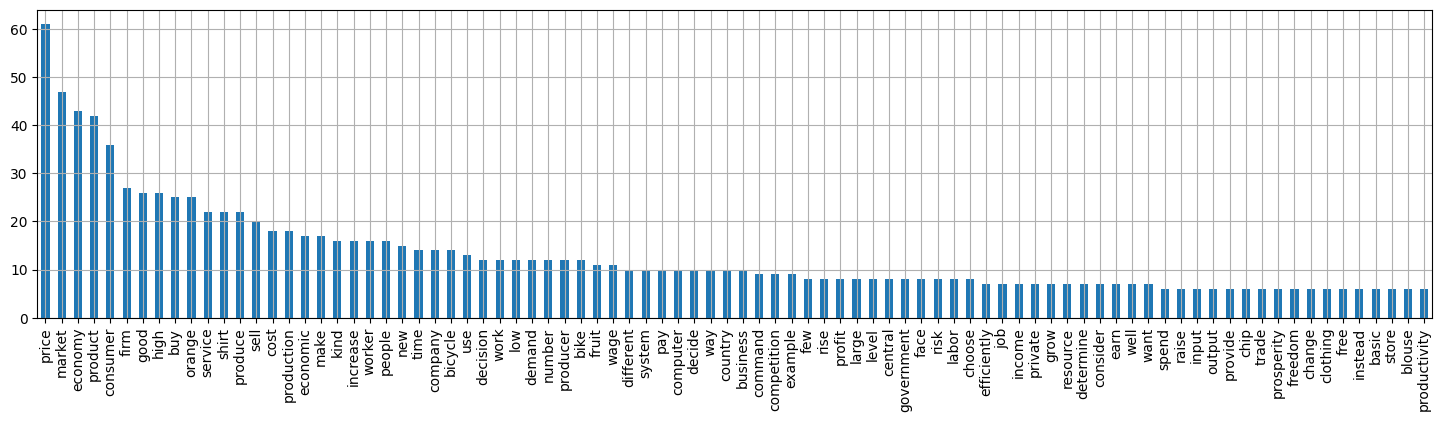

In [5]:
'''
# Выполним чтение результатов Шага №1 из временного файла и десериализуем полученные данные в объект
import pickle

with open('data.pickle', 'rb') as f:
    words = pickle.load(f)

print(words)
'''

import spacy
import string
from langdetect import detect_langs

from collections import Counter

import pandas as pd
import pandas_profiling as pp

import matplotlib.pyplot as plt
%matplotlib inline


# Загружаем текст из файла 
with open('text_28000.txt', 'r') as f:
    text = f.read();


# TODO: отсортировать языки и выбрать основной язык текста 
print(detect_langs(text))

sp = spacy.load('en_core_web_sm')

document = sp(text)

#for sentence in document.sents:
#    for word in sentence:
#        print(word.text, word.lemma_, word.pos_)

# Отбираем только значимые слова - существительные, глаголы и прилагательные
#words = [word.lemma_ for sentence in document.sents for word in sentence if word.pos_ in ('VERB','NOUN','AUX')]

# Другой вариант - исключаем из набора стоп-слова
stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation
#print(stop_words)

words = [word.lemma_ for sentence in document.sents for word in sentence
               if word.pos_ not in ('PRON','SPACE','SYM','X') and 
                  word.lower_ not in stop_words and 
                  word.lower_ not in punctuations]

# Сформируем словарь содержащий все выделенные в тексте слова и подсчитаем частоту их вхождения в текст
words_dict = {}
for word, freq in Counter(words).items():
    words_dict[word] = freq

# Преобразуем данные в pandas data_frame для удобства анализа и отображения
words_df = pd.DataFrame.from_dict(words_dict, orient= 'index').rename(columns={0:'Frequency'})

# Отобразим результаты
print('\nПеречень слов отсортированный по частоте, для значений частоты >5\n',
    words_df[words_df.Frequency > 5].sort_values(by='Frequency', ascending=False))

print('\nРезультаты анализа: количество значимых слов/ минимальная / максимальная / средняя встречаемость\n',
    words_df.agg({'Frequency': ['count', 'min', 'max', 'mean', ]}).T)

print('\nДиаграмма встречаемости слов в тексте')
plt.figure(figsize=(18,4))
words_df[words_df.Frequency > 5].sort_values(by='Frequency', ascending=False).Frequency.plot.bar()
plt.grid()

#pp.ProfileReport(words_df).to_file('words_report_data.html')